In [1]:
import matplotlib.pyplot as plt
from pathlib import Path
import pandas as pd
import numpy as np
from matplotlib import gridspec

In [2]:
MODELS = ["esm_t6", "esm_t12", "esm_t30", "esm_t33", "esm_t36", "ankh-base", "ankh-large", "prostt5", "prott5", "ohe"]
ALGOS = ["lr", "rf", "knn"]
LAYERS = {
    "esm_t6": 6,
    "esm_t12": 12,
    "esm_t30": 30,
    "esm_t33": 33,
    "esm_t36": 36,
    "ankh-base": 48,
    "ankh-large": 48,
    "prostt5": 24,
    "prott5": 24,
    "ohe": 0,
}
# 270 model layers x 3 datasets = 810 ID computations

LINES = {
    "lr": "-",
    "knn": "--",
    "rf": "dotted",
}
MODEL_COLORS = {
    "esm_t6": "lightsteelblue",
    "esm_t12": "cornflowerblue",
    "esm_t30": "royalblue",
    "esm_t33": "mediumblue",
    "esm_t36": "darkblue",
    "ankh-base": "lime",
    "ankh-large": "darkgreen",
    "prostt5": "orangered",
    "prott5": "darkorange",
    "ohe": "gray",
}

CLASS_METRIC = "ACC"
ROOT = Path("/") / "scratch" / "SCRATCH_SAS" / "roman" / "SMTB" / "embeddings"
RELATIVE = True

Path("figures").mkdir(exist_ok=True)

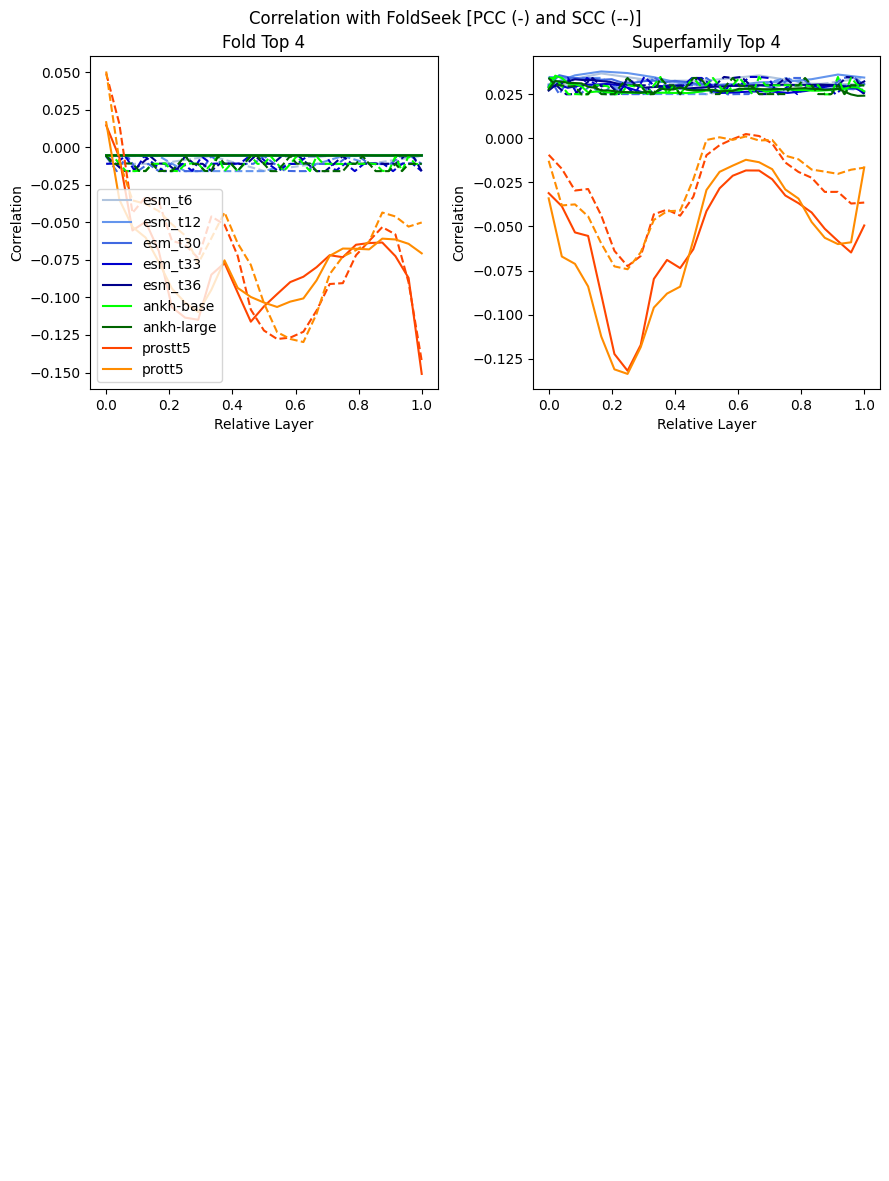

In [5]:
fig = plt.figure(figsize=(9, 12))
gs = gridspec.GridSpec(3, 2, figure=fig)
axs = [
    [fig.add_subplot(gs[0, 0]), fig.add_subplot(gs[0, 1])],
    [fig.add_subplot(gs[1, 0]), fig.add_subplot(gs[1, 1])],
    [fig.add_subplot(gs[2, 0]), fig.add_subplot(gs[2, 1])],
]

for i, level in enumerate(["fold", "superfamily"]):
    for model in MODELS[:-1]:
        pearson, spearman = [], []
        for layer in range(LAYERS[model] + 1):
            df = pd.read_csv(ROOT / model / "scope_40_208" / f"layer_{layer}" / f"correlations_{level}_4.pkl")
            pearson.append(df["pearson"].values[0])
            spearman.append(df["spearman"].values[0])
        if RELATIVE:
            axs[0][i].plot(np.arange(0, 1 + 1e-5, 1 / (LAYERS[model])), pearson, label=model, color=MODEL_COLORS[model], linestyle="solid")
            axs[0][i].plot(np.arange(0, 1 + 1e-5, 1 / (LAYERS[model])), spearman, color=MODEL_COLORS[model], linestyle="dashed")
        else:
            axs[0][i].plot(pearson, label=model, color=MODEL_COLORS[model], linestyle="solid")
            axs[0][i].plot(spearman, label=model, color=MODEL_COLORS[model], linestyle="dashed")

    axs[0][i].set_xlabel(("Relative" if RELATIVE else "Absolute") + " Layer")
    axs[0][i].set_ylabel("Correlation")
    axs[0][i].set_title(level.capitalize() + " Top 4")

axs[0][0].legend()

axs[1][0].set_axis_off()
axs[1][1].set_axis_off()
axs[2][0].set_axis_off()
axs[2][1].set_axis_off()

plt.suptitle("Correlation with FoldSeek [PCC (-) and SCC (--)]")
plt.tight_layout()
plt.savefig("figures/page11.pdf", dpi=300)
plt.show()

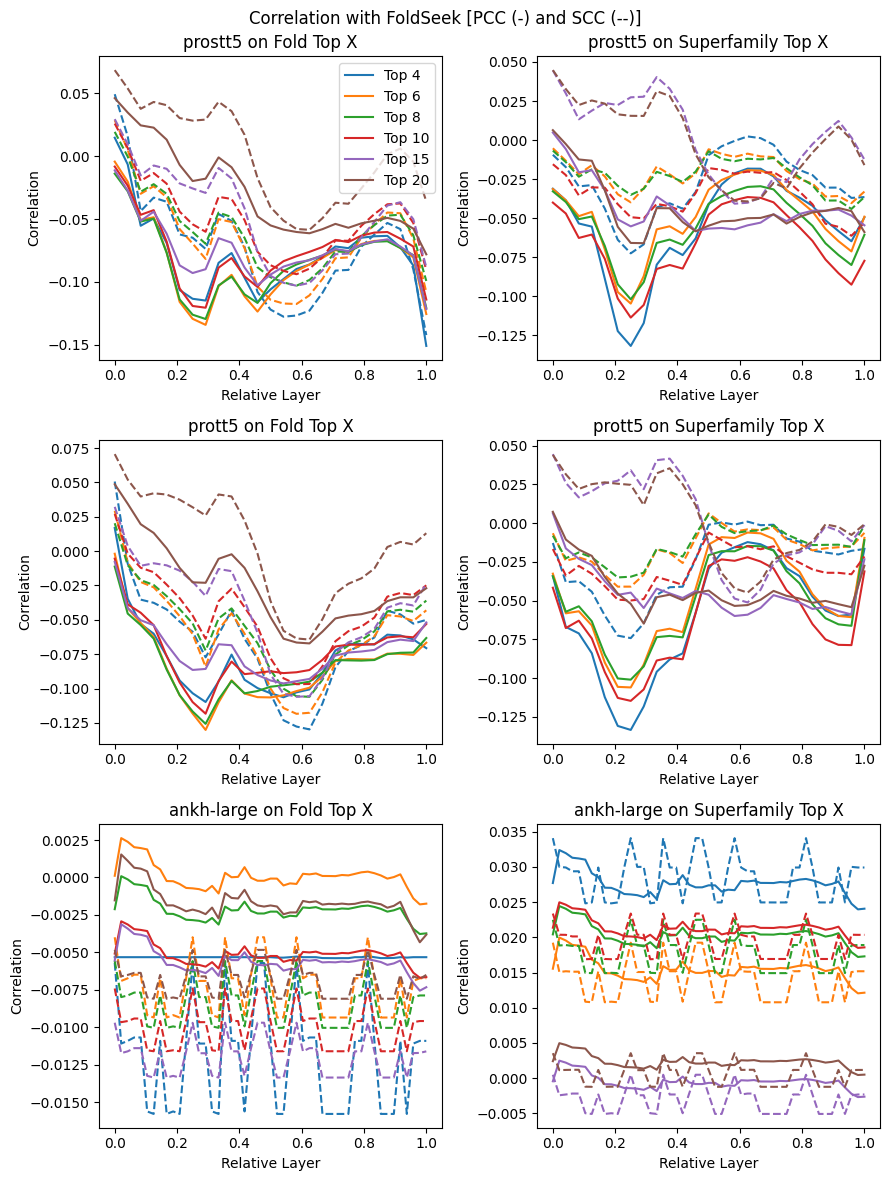

In [8]:
fig = plt.figure(figsize=(9, 12))
gs = gridspec.GridSpec(3, 2, figure=fig)
axs = [
    [fig.add_subplot(gs[0, 0]), fig.add_subplot(gs[0, 1])],
    [fig.add_subplot(gs[1, 0]), fig.add_subplot(gs[1, 1])],
    [fig.add_subplot(gs[2, 0]), fig.add_subplot(gs[2, 1])],
]

colors = ["tab:blue", "tab:orange", "tab:green", "tab:red", "tab:purple", "tab:brown"]

for i, level in enumerate(["fold", "superfamily"]):
    for j, model in enumerate(["prostt5", "prott5", "ankh-large"]):
        for c, num_classes in enumerate([4, 6, 8, 10, 15, 20]):
            pearson, spearman = [], []
            for layer in range(LAYERS[model] + 1):
                df = pd.read_csv(ROOT / model / "scope_40_208" / f"layer_{layer}" / f"correlations_{level}_{num_classes}.pkl")
                pearson.append(df["pearson"].values[0])
                spearman.append(df["spearman"].values[0])
            if RELATIVE:
                axs[j][i].plot(np.arange(0, 1 + 1e-5, 1 / (LAYERS[model])), pearson, color=colors[c], linestyle="solid", label=f"Top {num_classes}")
                axs[j][i].plot(np.arange(0, 1 + 1e-5, 1 / (LAYERS[model])), spearman, color=colors[c], linestyle="dashed")
            else:
                axs[j][i].plot(pearson, label=model, linestyle="solid")
                axs[j][i].plot(spearman, label=model, linestyle="dashed")

        axs[j][i].set_xlabel(("Relative" if RELATIVE else "Absolute") + " Layer")
        axs[j][i].set_ylabel("Correlation")
        axs[j][i].set_title(f"{model} on {level.capitalize()} Top X")

axs[0][0].legend()

plt.suptitle("Correlation with FoldSeek [PCC (-) and SCC (--)]")
plt.tight_layout()
plt.savefig("figures/page12.pdf", dpi=300)
plt.show()